In [157]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import sympy
from sympy.abc import x
%matplotlib inline

In [200]:
# Linear Regression Class
class Linear_Regression():
    def __init__(self, data):
        self.data = data # Pandas data frame
        self.n = self.data.shape[0]
        self.p = self.data.shape[1]-1
        self.X = self.data.iloc[:, :self.p].to_numpy()
        self.X = np.insert(self.X, 0, np.ones(self.n), axis=1)
        self.Y = self.data.iloc[:, -1].to_numpy().reshape(-1, 1)
        self.param = np.random.uniform(low=-1, high=1, size=[self.p+1, 1])
        print("Params Dim: ", self.p)
        print("Data Size: ", self.n)
        
        # Pre-Computed results
        self.XTX = np.matmul(np.transpose(self.X), self.X)
        self.XTY = np.matmul(np.transpose(self.X), self.Y)
        
    
    def h_func(self):
        return np.matmul(self.X, self.param)
    
    def MSE(self):
        return ((self.h_func() - self.Y) ** 2).sum() / self.n
    
    def loss(self):
        return self.MSE() / 2
    
    def grad(self):
        return (np.matmul(self.XTX, self.param) - self.XTY) / self.n
    
    def evaluate(self, newdata):
        # newdata requires to be numpy format in size of m-by-11
        new_X = newdata.reshape(-1, self.p).copy()
        new_X  = np.insert(new_X , 0, np.ones(new_X .shape[0]), axis=1)
        return np.matmul(new_X, self.param)
    
    def cheat(self):
        opt_param = np.matmul(np.linalg.inv(self.XTX), self.XTY)
        opt_MSE = ((np.matmul(self.X, opt_param) - self.Y) ** 2).sum() / self.n
        print("Theoretical Optimized MSE: ", opt_MSE)
        print("Theoretical Optimized Params: ", '\n',opt_param)

        
        
    
class SGD():
    def __init__(self, alpha, model):
        self.model = model # A model class, require model has attributes named "loss" and "grad"
        self.alpha = alpha # Learning Rate
        
    def step(self):
        grad = self.model.grad()
        self.model.param -= grad * self.alpha
    
    def model_reset(self):
        self.model.param = np.random.uniform(low=-1, high=1, size=[self.model.p+1, 1])
    
    def train(self, max_iter, log_interval = 1):
        for i in range(max_iter):
            self.step()
            if i % log_interval == 0:
                print("Iteration: ", i, "Loss: ", self.model.loss())
        

In [275]:
def main():
    testlist=["synthetic-1.csv" ,"synthetic-2.csv"]
    polynomial = [5]
    learning_rate=0.001
    for i in polynomial:
        print(testlist[0]," ","Polynomial",i)
        powerof(testlist[0],i,learning_rate)

        print('---------------------------------------------')
    print('\n')
    for i in polynomial:
        print(testlist[1]," ","Polynomial",i)
        powerof(testlist[1],i,learning_rate)
        print('---------------------------------------------')
main()


synthetic-1.csv   Polynomial 5
Params Dim:  5
Data Size:  100
Iteration:  0 Loss:  52.90378245140153
Iteration:  20000 Loss:  4.454202826058388
Iteration:  40000 Loss:  4.220754434816036
Iteration:  60000 Loss:  4.160586614839601
Iteration:  80000 Loss:  4.144995990353708
Parameters:  
 [[-3.02026947]
 [10.82867319]
 [-1.62417577]
 [-3.38782085]
 [ 0.73654773]
 [-0.12122076]]
MSE:  8.281903732600178
Theoretical Optimized MSE:  8.279069614535683
Theoretical Optimized Params:  
 [[-2.99550672]
 [11.02110314]
 [-1.654831  ]
 [-3.59607972]
 [ 0.74259454]
 [-0.07605549]]
---------------------------------------------


synthetic-2.csv   Polynomial 5
Params Dim:  5
Data Size:  100
Iteration:  0 Loss:  11.109018356065512
Iteration:  20000 Loss:  0.15417798497681723
Iteration:  40000 Loss:  0.15153016979073036
Iteration:  60000 Loss:  0.15108938184622928
Iteration:  80000 Loss:  0.15098739793935845
Parameters:  
 [[ 0.48433072]
 [-0.38658959]
 [-0.52815878]
 [ 0.33797196]
 [ 0.10995532]
 [-0.06

In [252]:
# Initialization
def powerof(filename,n,learning_rate):

    dat = pd.read_csv(filename, header=None)
    dat.columns =['x', 'y'] 
    if (n==1):
        pass
    if (n==2):
        dat['x_power2'] = np.power(dat['x'],2)
        dat = dat[["x","x_power2","y"]]
    if (n==3):
        dat['x_power2'] = np.power(dat['x'],2)
        dat['x_power3'] = np.power(dat['x'],n)
        dat = dat[["x","x_power2","x_power3","y"]]
    if (n==5):
        dat['x_power2'] = np.power(dat['x'],2)
        dat['x_power3'] = np.power(dat['x'],3)
        dat['x_power4'] = np.power(dat['x'],4)
        dat['x_power5'] = np.power(dat['x'],5)
        dat = dat[["x","x_power2","x_power3", "x_power4","x_power5","y"]]
    if (n==6):
        dat['x_power2'] = np.power(dat['x'],2)
        dat['x_power3'] = np.power(dat['x'],3)
        dat['x_power4'] = np.power(dat['x'],4)
        dat['x_power5'] = np.power(dat['x'],5)
        dat['x_power6'] = np.power(dat['x'],6)
        dat = dat[["x","x_power2","x_power3", "x_power4","x_power5","x_power6","y"]]

    lm = Linear_Regression(dat)
    optimizer = SGD(learning_rate, lm)
    # Train
    optimizer.model_reset()
    optimizer.train(100000, log_interval = 20000)
    print("Parameters: ", '\n',optimizer.model.param)
    parameter = optimizer.model.param

    print("MSE: ", optimizer.model.MSE())
    optimizer.model.cheat()
    return parameter

In [ ]:
-------------------------Graph-----------------------------------

In [214]:
# Initialization
def powerof(filename,n,learning_rate):

    dat = pd.read_csv(filename, header=None)
    dat.columns =['x', 'y'] 
    if (n==1):
        pass
    if (n==2):
        dat['x_power2'] = np.power(dat['x'],2)
        dat = dat[["x","x_power2","y"]]
    if (n==3):
        dat['x_power2'] = np.power(dat['x'],2)
        dat['x_power3'] = np.power(dat['x'],n)
        dat = dat[["x","x_power2","x_power3","y"]]
    if (n==5):
        dat['x_power2'] = np.power(dat['x'],2)
        dat['x_power3'] = np.power(dat['x'],3)
        dat['x_power4'] = np.power(dat['x'],4)
        dat['x_power5'] = np.power(dat['x'],5)
        dat = dat[["x","x_power2","x_power3", "x_power4","x_power5","y"]]
    if (n==6):
        dat['x_power2'] = np.power(dat['x'],2)
        dat['x_power3'] = np.power(dat['x'],3)
        dat['x_power4'] = np.power(dat['x'],4)
        dat['x_power5'] = np.power(dat['x'],5)
        dat['x_power6'] = np.power(dat['x'],6)
        dat = dat[["x","x_power2","x_power3", "x_power4","x_power5","x_power6","y"]]

    lm = Linear_Regression(dat)
    optimizer = SGD(learning_rate, lm)
    # Train
    optimizer.model_reset()
    optimizer.train(100000, log_interval = 1000000)
    parameter = optimizer.model.param
#     optimizer.model.cheat()
    return parameter

In [246]:
def PolyCoefficients(x, coeffs):
    y = 0
    for i in range(len(coeffs)):
        y += coeffs[i][0]*x**i
    return y

Params Dim:  6
Data Size:  100
Iteration:  0 Loss:  103.54948802947834
Iteration:  20000 Loss:  4.558137779085123
Iteration:  40000 Loss:  4.252262004252587
Iteration:  60000 Loss:  4.170375122895004
Iteration:  80000 Loss:  4.146543105735314
Parameters:  
 [[-3.02406884]
 [10.79195734]
 [-1.74879692]
 [-3.35260894]
 [ 0.88599881]
 [-0.12748739]
 [-0.03368453]]
MSE:  8.277043886435
Theoretical Optimized MSE:  8.263057481207145
Theoretical Optimized Params:  
 [[-2.83216737]
 [11.07019398]
 [-2.46647867]
 [-3.66196138]
 [ 1.37430522]
 [-0.05861247]
 [-0.12029863]]
Params Dim:  2
Data Size:  100
Iteration:  0 Loss:  20.164102868126932
Iteration:  20000 Loss:  15.202695372278077
Iteration:  40000 Loss:  15.202694957982382
Iteration:  60000 Loss:  15.202694957982303
Iteration:  80000 Loss:  15.202694957982303
Parameters:  
 [[-4.4205321 ]
 [ 1.90026024]
 [ 0.6768219 ]]
MSE:  30.405389915964605
Theoretical Optimized MSE:  30.4053899159646
Theoretical Optimized Params:  
 [[-4.4205321 ]
 [ 1

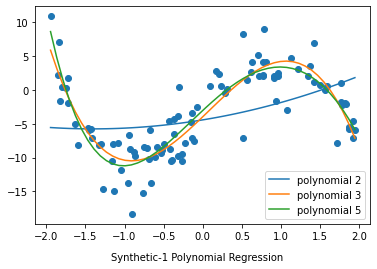

In [268]:
filename = "synthetic-1.csv"
w=powerof(filename,n=6,learning_rate=0.001)
x_2=powerof(filename,n=2,learning_rate=0.001)
x_3=powerof(filename,n=3,learning_rate=0.001)
x_5=powerof(filename,n=5,learning_rate=0.001)
dat = pd.read_csv(filename, header=None)
dat.columns =['x', 'y'] 
fig = plt.figure()
plt.scatter(dat.x,dat.y)

x = np.linspace(min(dat.x),max(dat.x))

coeffs = x_2
line2, = plt.plot(x, PolyCoefficients(x, coeffs),label="polynomial 2")


coeffs = x_3
line3, = plt.plot(x, PolyCoefficients(x, coeffs),label="polynomial 3")

coeffs = x_5
line5, = plt.plot(x, PolyCoefficients(x, coeffs),label="polynomial 5")

leg = plt.legend(loc='lower right')

fig.text(.5, .0001, "Synthetic-1 Polynomial Regression", ha='center')

plt.savefig("sy.png")


<Figure size 432x288 with 0 Axes>

Params Dim:  6
Data Size:  100
Iteration:  0 Loss:  24.579678152239424
Iteration:  20000 Loss:  0.05534815219576173
Iteration:  40000 Loss:  0.042080243772824495
Iteration:  60000 Loss:  0.03457773483185645
Iteration:  80000 Loss:  0.03025526701744439
Parameters:  
 [[ 0.12079415]
 [-0.01039254]
 [ 1.99536148]
 [-0.11479598]
 [-1.92410787]
 [ 0.046841  ]
 [ 0.38914366]]
MSE:  0.05549061383104651
Theoretical Optimized MSE:  0.048466168014796675
Theoretical Optimized Params:  
 [[ 0.01599803]
 [ 0.11989338]
 [ 2.55326196]
 [-0.24495262]
 [-2.32405494]
 [ 0.07565274]
 [ 0.46029879]]
Params Dim:  2
Data Size:  100
Iteration:  0 Loss:  1.1634350241321108
Iteration:  20000 Loss:  0.16382147596386573
Iteration:  40000 Loss:  0.16382147397276473
Iteration:  60000 Loss:  0.1638214739727645
Iteration:  80000 Loss:  0.16382147397276456
Parameters:  
 [[ 0.37024944]
 [-0.04780947]
 [-0.17884706]]
MSE:  0.3276429479455291
Theoretical Optimized MSE:  0.327642947945529
Theoretical Optimized Params:  

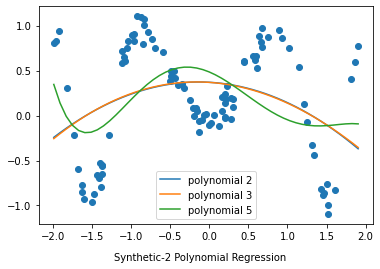

In [276]:
filename = "synthetic-2.csv"
w=powerof(filename,n=6,learning_rate=0.001)
x_2=powerof(filename,n=2,learning_rate=0.001)
x_3=powerof(filename,n=3,learning_rate=0.001)
x_5=powerof(filename,n=5,learning_rate=0.001)
dat = pd.read_csv(filename, header=None)
dat.columns =['x', 'y'] 
fig = plt.figure()
plt.scatter(dat.x,dat.y)

x = np.linspace(min(dat.x),max(dat.x))

coeffs = x_2
line2, = plt.plot(x, PolyCoefficients(x, coeffs),label="polynomial 2")


coeffs = x_3
line3, = plt.plot(x, PolyCoefficients(x, coeffs),label="polynomial 3")

coeffs = x_5
line5, = plt.plot(x, PolyCoefficients(x, coeffs),label="polynomial 5")

leg = plt.legend(loc='lower center')

fig.text(.5, .0001, "Synthetic-2 Polynomial Regression", ha='center')



plt.savefig("sy_2.png")